In [8]:
import json
import statistics as st
import matplotlib.pyplot as plt

In [9]:
%matplotlib inline

In [10]:
with open('speech-analysis_1997-2016.json') as f:
    data = json.load(f)

In [11]:
for year, yeardata in data.items():
    year_avg_sum = 0
    for month, monthdata in yeardata.items():
        monthdata = [s for s in monthdata if s['lyrics'] is not None]
        monthdata = [s for s in monthdata if s['lyrics']['sentiment'] is not None]
        year_avg_sum += st.mean([s['lyrics']['sentiment'] for s in monthdata])
    
    yeardata['avg'] = year_avg_sum / 12.0

In [12]:
avg_data = {year: round(yeardata['avg'], 4) for year, yeardata in data.items()}
sorted_avg = sorted(avg_data.items())

In [13]:
x, y = zip(*sorted_avg)
print(sorted_avg)

[('1997', -0.0167), ('1998', -0.0483), ('1999', -0.0464), ('2000', 0.01), ('2001', -0.109), ('2002', -0.0849), ('2003', -0.0667), ('2004', -0.0642), ('2005', -0.0958), ('2006', -0.0452), ('2007', -0.0775), ('2008', -0.0868), ('2009', -0.0475), ('2010', 0.0356), ('2011', -0.1075), ('2012', -0.1469), ('2013', -0.0548), ('2014', -0.085), ('2015', -0.0439), ('2016', -0.1058)]


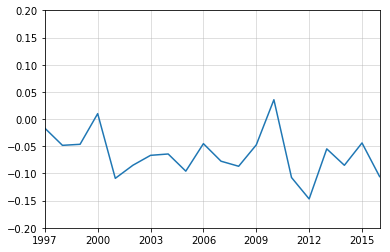

In [14]:
plt.xticks(range(1997, 2017, 3))
plt.axis([1997, 2016, -0.2, 0.2])
plt.grid(alpha=0.5)
plt.plot(x, y)